In [1]:
import mne
import os

# Directorio donde se encuentran los archivos EEG
directorio_datos = r"C:\Users\Usuario\Documents\Datos EEG\PWI_DATOS_EEG_PROCESADOS_BUENOS\Set_Average_por_Sujeto_1000ms"

# Diccionario para almacenar los registros EEG por condición
registros_eeg = {"congruente": {}, "incongruente_rel": {}, "incongruente_no_rel": {}}

# Condiciones y sus sufijos de archivo correspondientes
condiciones = {
    "congruente": "PWI_CON",
    "incongruente_rel": "PWI_INC_REL",
    "incongruente_no_rel": "PWI_INC_UNREL"
}

# Sujetos a excluir de la carga de archivos, pero deben aparecer en el diccionario
sujetos_excluir = {11, 30}

# Iterar sobre los 40 sujetos para cada condición
for sujeto_id in range(1, 41):
    for condicion, sufijo_archivo in condiciones.items():
        sujeto_key = f"Sujeto_{sujeto_id}"

        if sujeto_id in sujetos_excluir:
            registros_eeg[condicion][sujeto_key] = None
            print(f"{sujeto_key} excluido de la carga en '{condicion}', asignado como None.")
            continue  # Saltar a la siguiente condición

        nombre_archivo = f"S{sujeto_id}_{sufijo_archivo}.set"
        ruta_archivo = os.path.join(directorio_datos, nombre_archivo)

        try:
            # Cargar el archivo .set como un registro continuo
            registro_continuo = mne.io.read_raw_eeglab(ruta_archivo)
            registros_eeg[condicion][sujeto_key] = registro_continuo
            print(f"{nombre_archivo} cargado exitosamente en '{condicion}'.")
        except FileNotFoundError:
            registros_eeg[condicion][sujeto_key] = None
            print(f"{nombre_archivo} no encontrado en '{condicion}'.")
        except Exception as e:
            registros_eeg[condicion][sujeto_key] = None
            print(f"Error al cargar {nombre_archivo} en '{condicion}': {e}")

# Resumen de la carga de archivos
# print("\nResumen de las cargas:")
# for condicion, sujetos in registros_eeg.items():
#     print(f"\nCondición: {condicion}")
#     for sujeto, datos in sujetos.items():
#         estado = "Cargado" if datos is not None else "No cargado"
#         print(f"  {sujeto}: {estado}")


Reading C:\Users\Usuario\Documents\Datos EEG\PWI_DATOS_EEG_PROCESADOS_BUENOS\Set_Average_por_Sujeto_1000ms\S1_PWI_CON.fdt
S1_PWI_CON.set cargado exitosamente en 'congruente'.
Reading C:\Users\Usuario\Documents\Datos EEG\PWI_DATOS_EEG_PROCESADOS_BUENOS\Set_Average_por_Sujeto_1000ms\S1_PWI_INC_REL.fdt
S1_PWI_INC_REL.set cargado exitosamente en 'incongruente_rel'.
Reading C:\Users\Usuario\Documents\Datos EEG\PWI_DATOS_EEG_PROCESADOS_BUENOS\Set_Average_por_Sujeto_1000ms\S1_PWI_INC_UNREL.fdt
S1_PWI_INC_UNREL.set cargado exitosamente en 'incongruente_no_rel'.
Reading C:\Users\Usuario\Documents\Datos EEG\PWI_DATOS_EEG_PROCESADOS_BUENOS\Set_Average_por_Sujeto_1000ms\S2_PWI_CON.fdt
S2_PWI_CON.set cargado exitosamente en 'congruente'.
Reading C:\Users\Usuario\Documents\Datos EEG\PWI_DATOS_EEG_PROCESADOS_BUENOS\Set_Average_por_Sujeto_1000ms\S2_PWI_INC_REL.fdt
S2_PWI_INC_REL.set cargado exitosamente en 'incongruente_rel'.
Reading C:\Users\Usuario\Documents\Datos EEG\PWI_DATOS_EEG_PROCESADOS_BUENOS

In [2]:
import numpy as np
import mne

def escalar_minmax_personalizado(datos, min_abs, max_abs):
    # Escalar valores entre -1 y 1 usando el máximo absoluto
    return datos / max_abs

def calcular_minmax_scaler_registros_eeg(registros_eeg):
    
    registros_eeg_minmax = {"congruente": {}, "incongruente_rel": {}, "incongruente_no_rel": {}}

    for sujeto in registros_eeg["congruente"]:  # Iterar sobre sujetos
        if registros_eeg["congruente"][sujeto] is None:
            # Si el sujeto fue excluido, mantenerlo como None en todos los casos
            for cond in registros_eeg_minmax:
                registros_eeg_minmax[cond][sujeto] = None
            continue

        # Obtener datos de la condición congruente
        datos_congruente = registros_eeg["congruente"][sujeto].get_data()  # (Canales x Tiempos)

        # Calcular máximo absoluto por canal para escalar entre -1 y 1
        max_abs_congruente = np.max(np.abs(datos_congruente), axis=1, keepdims=True)
        max_abs_congruente[max_abs_congruente == 0] = 1  # Evitar divisiones por cero

        # Normalizar todas las condiciones respecto a la condición congruente
        for condicion in registros_eeg:
            if registros_eeg[condicion][sujeto] is not None:
                datos_condicion = registros_eeg[condicion][sujeto].get_data()
                datos_escalados = datos_condicion / max_abs_congruente

                # Crear nueva instancia de RawArray con los datos normalizados
                info = registros_eeg[condicion][sujeto].info  # Mantener la metadata original
                registros_eeg_minmax[condicion][sujeto] = mne.io.RawArray(datos_escalados, info)
            else:
                registros_eeg_minmax[condicion][sujeto] = None  # Mantener sujetos sin datos

    return registros_eeg_minmax

# Aplicar el escalado a los datos cargados
registros_eeg_minmax = calcular_minmax_scaler_registros_eeg(registros_eeg)


Creating RawArray with float64 data, n_channels=64, n_times=1229
    Range : 0 ... 1228 =      0.000 ...     1.199 secs
Ready.
Creating RawArray with float64 data, n_channels=64, n_times=1229
    Range : 0 ... 1228 =      0.000 ...     1.199 secs
Ready.
Creating RawArray with float64 data, n_channels=64, n_times=1229
    Range : 0 ... 1228 =      0.000 ...     1.199 secs
Ready.
Creating RawArray with float64 data, n_channels=64, n_times=1229
    Range : 0 ... 1228 =      0.000 ...     1.199 secs
Ready.
Creating RawArray with float64 data, n_channels=64, n_times=1229
    Range : 0 ... 1228 =      0.000 ...     1.199 secs
Ready.
Creating RawArray with float64 data, n_channels=64, n_times=1229
    Range : 0 ... 1228 =      0.000 ...     1.199 secs
Ready.
Creating RawArray with float64 data, n_channels=64, n_times=1229
    Range : 0 ... 1228 =      0.000 ...     1.199 secs
Ready.
Creating RawArray with float64 data, n_channels=64, n_times=1229
    Range : 0 ... 1228 =      0.000 ...     1.

In [3]:
import numpy as np
import mne

def calcular_grand_average(registros_eeg):
    
    grand_average = {}

    for condicion in registros_eeg:
        datos_acumulados = []
        info_referencia = None  # Para guardar la metadata de un sujeto válido

        for sujeto in registros_eeg[condicion]:
            if registros_eeg[condicion][sujeto] is not None:
                datos_sujeto = registros_eeg[condicion][sujeto].get_data()  # (Canales x Tiempos)
                datos_acumulados.append(datos_sujeto)

                # Guardamos la info del primer sujeto válido
                if info_referencia is None:
                    info_referencia = registros_eeg[condicion][sujeto].info

        if len(datos_acumulados) == 0:
            print(f"No hay datos válidos para la condición {condicion}.")
            grand_average[condicion] = None
            continue

        # Convertir lista a array y promediar entre sujetos (manteniendo Canales x Tiempos)
        datos_promedio = np.mean(np.array(datos_acumulados), axis=0)

        # Crear un RawArray con los datos promediados
        grand_average[condicion] = mne.io.RawArray(datos_promedio, info_referencia)

    return grand_average

# Calcular el Grand Average
grand_average = calcular_grand_average(registros_eeg_minmax)

# Imprimir resumen de los resultados
for condicion, data in grand_average.items():
    if data is not None:
        print(f"Grand Average para {condicion}: {data}")
    else:
        print(f"No se pudo calcular el Grand Average para {condicion}.")


Creating RawArray with float64 data, n_channels=64, n_times=1229
    Range : 0 ... 1228 =      0.000 ...     1.199 secs
Ready.
Creating RawArray with float64 data, n_channels=64, n_times=1229
    Range : 0 ... 1228 =      0.000 ...     1.199 secs
Ready.
Creating RawArray with float64 data, n_channels=64, n_times=1229
    Range : 0 ... 1228 =      0.000 ...     1.199 secs
Ready.
Grand Average para congruente: <RawArray | 64 x 1229 (1.2 s), ~690 kB, data loaded>
Grand Average para incongruente_rel: <RawArray | 64 x 1229 (1.2 s), ~690 kB, data loaded>
Grand Average para incongruente_no_rel: <RawArray | 64 x 1229 (1.2 s), ~690 kB, data loaded>


In [5]:
grand_average['congruente']

<RawArray | 64 x 1229 (1.2 s), ~690 kB, data loaded>

In [41]:
import matplotlib.pyplot as plt
import numpy as np

def graficar_grand_average_por_canal(grand_average, colores=None):
    """
    Grafica el grand average por canal en un grid de 8x8 subplots.
    - Pre-estímulo de 200 ms (eje X de -200 a 1000 ms).
    - Ticks cada 200 ms con etiquetas visibles.
    - Leyenda en la parte inferior.
    """
    condiciones = list(grand_average.keys())

    if colores is None:
        colores = {
            "congruente": "green",
            "incongruente_rel": "orange",
            "incongruente_no_rel": "red"
        }

    raw_ejemplo = next(val for val in grand_average.values() if val is not None)
    tiempos = (raw_ejemplo.times - 0.2) * 1000  # eje X: -200 a 1000 ms
    n_canales = len(raw_ejemplo.ch_names)

    fig, axes = plt.subplots(8, 8, figsize=(12, 14))
    axes = axes.flatten()

    ticks_tiempo = np.arange(-200, 1001, 200)

    for ch_idx, ch_name in enumerate(raw_ejemplo.ch_names):
        ax = axes[ch_idx]

        for condicion in condiciones:
            raw = grand_average[condicion]
            if raw is not None:
                datos = raw.get_data(picks=[ch_idx])[0]
                ax.plot(tiempos, datos, label=condicion, color=colores.get(condicion, 'black'), linewidth=1)

        ax.set_title(ch_name, fontsize=6)
        ax.axhline(0, color='black', linestyle='--', linewidth=0.4)
        ax.axvline(0, color='gray', linestyle=':', linewidth=0.6)
        ax.set_xlim(-200, 1000)

        # Ticks de tiempo cada 200 ms, con etiquetas visibles
        ax.set_xticks(ticks_tiempo)
        ax.set_xlabel("Tiempo (ms)", fontsize=5)
        ax.set_ylabel("Amplitud Normalizada", fontsize=5)
        ax.tick_params(axis='both', labelsize=4)

    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.01), ncol=3, fontsize=8)

    plt.suptitle("Grand Average por Canal (64 electrodos)", fontsize=10)
    plt.tight_layout(rect=[0, 0.03, 1, 0.93])  # deja espacio para la leyenda abajo
    plt.show()


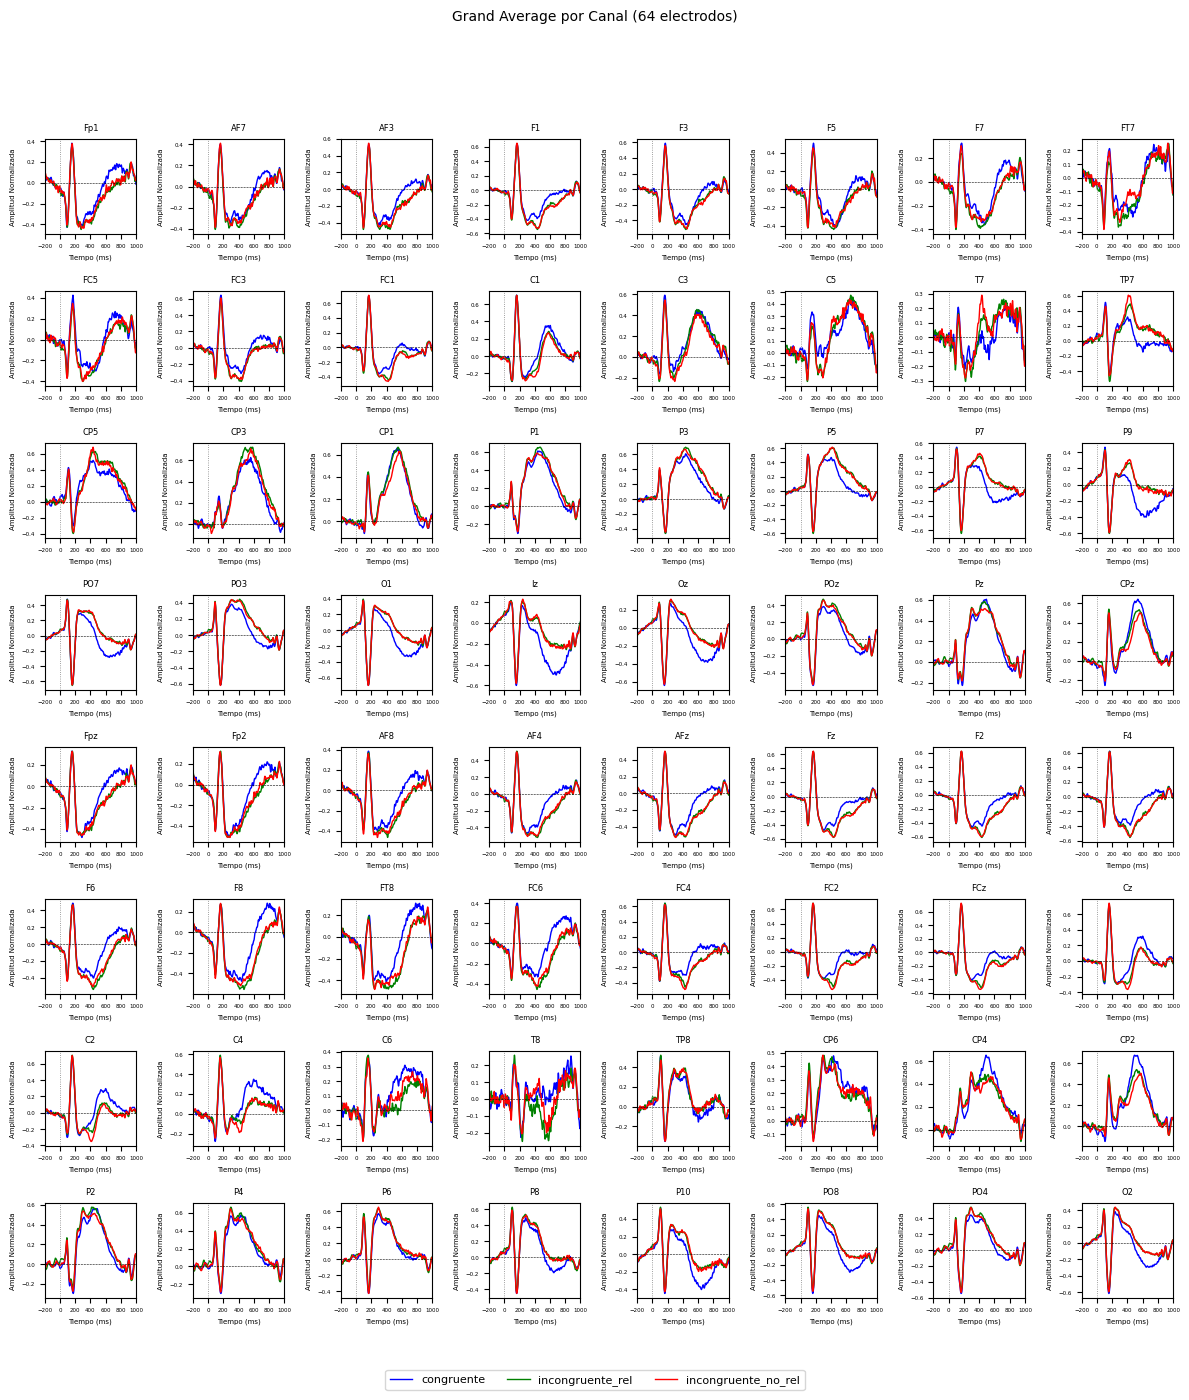

In [42]:
colores_personalizados = {
    "congruente": "blue",           # azul
    "incongruente_rel": "green",     # naranjo
    "incongruente_no_rel": "red"   # verde
}

graficar_grand_average_por_canal(grand_average, colores=colores_personalizados)


# Grand Average

In [2]:
import numpy as np
import mne

def calcular_grand_average(registros_eeg):
    
    grand_average = {}

    for condicion in registros_eeg:
        datos_acumulados = []
        info_referencia = None  # Para guardar la metadata de un sujeto válido

        for sujeto in registros_eeg[condicion]:
            if registros_eeg[condicion][sujeto] is not None:
                datos_sujeto = registros_eeg[condicion][sujeto].get_data()  # (Canales x Tiempos)
                datos_acumulados.append(datos_sujeto)

                # Guardamos la info del primer sujeto válido
                if info_referencia is None:
                    info_referencia = registros_eeg[condicion][sujeto].info

        if len(datos_acumulados) == 0:
            print(f"No hay datos válidos para la condición {condicion}.")
            grand_average[condicion] = None
            continue

        # Convertir lista a array y promediar entre sujetos (manteniendo Canales x Tiempos)
        datos_promedio = np.mean(np.array(datos_acumulados), axis=0)

        # Crear un RawArray con los datos promediados
        grand_average[condicion] = mne.io.RawArray(datos_promedio, info_referencia)

    return grand_average

# Calcular el Grand Average
grand_average = calcular_grand_average(registros_eeg)

# Imprimir resumen de los resultados
for condicion, data in grand_average.items():
    if data is not None:
        print(f"Grand Average para {condicion}: {data}")
    else:
        print(f"No se pudo calcular el Grand Average para {condicion}.")


Creating RawArray with float64 data, n_channels=64, n_times=1229
    Range : 0 ... 1228 =      0.000 ...     1.199 secs
Ready.
Creating RawArray with float64 data, n_channels=64, n_times=1229
    Range : 0 ... 1228 =      0.000 ...     1.199 secs
Ready.
Creating RawArray with float64 data, n_channels=64, n_times=1229
    Range : 0 ... 1228 =      0.000 ...     1.199 secs
Ready.
Grand Average para congruente: <RawArray | 64 x 1229 (1.2 s), ~690 kB, data loaded>
Grand Average para incongruente_rel: <RawArray | 64 x 1229 (1.2 s), ~690 kB, data loaded>
Grand Average para incongruente_no_rel: <RawArray | 64 x 1229 (1.2 s), ~690 kB, data loaded>


In [3]:
data_plot_congruente = grand_average['congruente']
data_plot_incongruente_rel = grand_average['incongruente_rel']
data_plot_incongruente_rel = grand_average['incongruente_no_rel']




In [4]:

tiempo_inicio_s = 600 / 1000
tiempo_fin_s = 1000 / 1000

tiempos = data_plot_congruente.times  # Tiempos en segundos
        
# Seleccionar los índices de tiempo para la ventana de 550-750 ms
idx_inicio = np.where(tiempos >= tiempo_inicio_s)[0][0]
idx_fin = np.where(tiempos <= tiempo_fin_s)[0][-1]

# Promediar los datos de la ventana seleccionada (550-750 ms)
data_promediada_congruente = np.mean(data_plot_congruente.get_data()[:, idx_inicio:idx_fin], axis=1)
data_promediada_incongruente_rel = np.mean(data_plot_incongruente_rel.get_data()[:, idx_inicio:idx_fin], axis=1)
data_promediada_incongruente_no_rel = np.mean(data_plot_incongruente_rel.get_data()[:, idx_inicio:idx_fin], axis=1)

In [8]:
data_plot = registros_eeg['congruente']['Sujeto_1']
import matplotlib.pyplot as plt


In [28]:
data_plot.ch_names

['Fp1',
 'AF7',
 'AF3',
 'F1',
 'F3',
 'F5',
 'F7',
 'FT7',
 'FC5',
 'FC3',
 'FC1',
 'C1',
 'C3',
 'C5',
 'T7',
 'TP7',
 'CP5',
 'CP3',
 'CP1',
 'P1',
 'P3',
 'P5',
 'P7',
 'P9',
 'PO7',
 'PO3',
 'O1',
 'Iz',
 'Oz',
 'POz',
 'Pz',
 'CPz',
 'Fpz',
 'Fp2',
 'AF8',
 'AF4',
 'AFz',
 'Fz',
 'F2',
 'F4',
 'F6',
 'F8',
 'FT8',
 'FC6',
 'FC4',
 'FC2',
 'FCz',
 'Cz',
 'C2',
 'C4',
 'C6',
 'T8',
 'TP8',
 'CP6',
 'CP4',
 'CP2',
 'P2',
 'P4',
 'P6',
 'P8',
 'P10',
 'PO8',
 'PO4',
 'O2']

In [29]:
ch_names=data_plot.ch_names

In [17]:
np.max(np.abs(data_promediada_congruente))


4.854961571139785e-06

In [18]:
np.max(np.abs(data_promediada_incongruente_rel))


2.469052645268677e-06

In [19]:
np.max(np.abs(data_promediada_incongruente_no_rel))

2.469052645268677e-06

In [23]:
ch_names=data_plot.ch_names

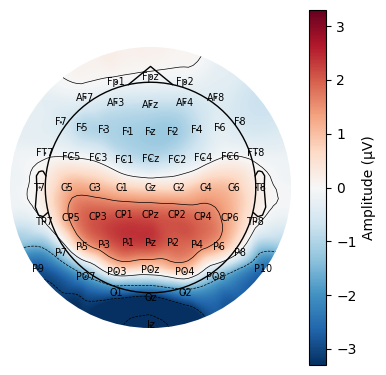

In [24]:
# Crear un objeto Evoked para poder graficar
info = data_plot.info  # Información de los datos EEG
evoked = mne.EvokedArray(data_promediada_congruente[:, np.newaxis]*1000000, info)

# Usar el tamaño de la figura dentro de `plot_topomap`
fig, ax = plt.subplots(figsize=(4, 4))  # Ajustar el tamaño de la figura

# Graficar el topoplot con la escala de colores de -1 a 1
im, _ = mne.viz.plot_topomap(evoked.data[:, 0], evoked.info, cmap="RdBu_r", contours=5, axes=ax, show=False, names=ch_names)

# Obtener los valores máximos y mínimos del topoplot para ajustar la escala manualmente
valores = evoked.data[:, 0]
vmin = -3.3
vmax = 3.3

# Establecer manualmente la escala de colores con la barra de color
im.set_clim(vmin=vmin, vmax=vmax)

# Agregar barra de color
fig.colorbar(im, ax=ax, orientation='vertical', label='Amplitude (μV)')

# Título y mostrar el gráfico
fig.suptitle(f"", fontsize=16)
plt.tight_layout()
fig.savefig(f"figuras/topoplot_congruente_grand_average.pdf", format='pdf')
fig.savefig(f"figuras/topoplot_congruente_grand_average.svg", format='svg')

plt.show()

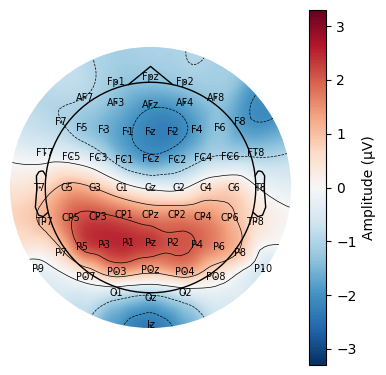

In [25]:
#
# Crear un objeto Evoked para poder graficar
info = data_plot.info  # Información de los datos EEG
evoked = mne.EvokedArray(data_promediada_incongruente_rel[:, np.newaxis]*1000000, info)

# Usar el tamaño de la figura dentro de `plot_topomap`
fig, ax = plt.subplots(figsize=(4, 4))  # Ajustar el tamaño de la figura

# Graficar el topoplot con la escala de colores de -1 a 1
im, _ = mne.viz.plot_topomap(evoked.data[:, 0], evoked.info, cmap="RdBu_r", contours=5, axes=ax, show=False, names=ch_names)

# Obtener los valores máximos y mínimos del topoplot para ajustar la escala manualmente
valores = evoked.data[:, 0]
vmin = -3.3
vmax = 3.3

# Establecer manualmente la escala de colores con la barra de color
im.set_clim(vmin=vmin, vmax=vmax)

# Agregar barra de color
fig.colorbar(im, ax=ax, orientation='vertical', label='Amplitude (μV)')

# Título y mostrar el gráfico
fig.suptitle(f"", fontsize=16)
plt.tight_layout()
fig.savefig(f"figuras/topoplot_incongruente_rel_grand_average.pdf", format='pdf')
fig.savefig(f"figuras/topoplot_incongruente_rel_grand_average.svg", format='svg')

plt.show()

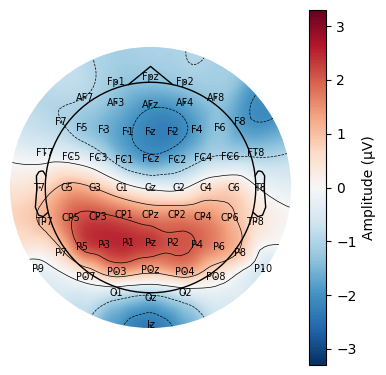

In [26]:
#
# Crear un objeto Evoked para poder graficar
info = data_plot.info  # Información de los datos EEG
evoked = mne.EvokedArray(data_promediada_incongruente_no_rel[:, np.newaxis]*1000000, info)

# Usar el tamaño de la figura dentro de `plot_topomap`
fig, ax = plt.subplots(figsize=(4, 4))  # Ajustar el tamaño de la figura

# Graficar el topoplot con la escala de colores de -1 a 1
im, _ = mne.viz.plot_topomap(evoked.data[:, 0], evoked.info, cmap="RdBu_r", contours=5, axes=ax, show=False, names=ch_names)

# Obtener los valores máximos y mínimos del topoplot para ajustar la escala manualmente
valores = evoked.data[:, 0]
vmin = -3.3
vmax = 3.3

# Establecer manualmente la escala de colores con la barra de color
im.set_clim(vmin=vmin, vmax=vmax)

# Agregar barra de color
fig.colorbar(im, ax=ax, orientation='vertical', label='Amplitude (μV)')

# Título y mostrar el gráfico
fig.suptitle(f"", fontsize=16)
plt.tight_layout()
fig.savefig(f"figuras/topoplot_incongruente_no_rel_grand_average.pdf", format='pdf')
fig.savefig(f"figuras/topoplot_incongruente_no_rel_grand_average.svg", format='svg')

plt.show()

In [32]:
df_electrodes = grand_average['congruente'].ch_names

import numpy as np

pools = {
    "Temporal": ['FT7', 'T7','TP7'],
    "Central": ['C1', 'C2', 'Cz'],
    "Frontal": ['F1', 'F2', 'FCz', 'Fz'],
    "CPz": ['CPz'],
    "Parietal": ['POz', 'Pz'],
    "Occipital": ['O1', 'O2', 'Oz']
}

EEG_pool_data = {}

for condition, raw_data in grand_average.items():
    pool_dict = {}
    
    # Obtener los datos como array numpy (shape: [n_channels, n_samples])
    data = raw_data.get_data()
    
    for pool_name, electrodes in pools.items():
        # Obtener los índices de los electrodos en la lista df_electrodes
        indices = [df_electrodes.index(e) for e in electrodes if e in df_electrodes]

        if indices:  # Asegurarse de que no esté vacío
            pool_data = data[indices, :]  # Extraer datos
            pool_dict[pool_name] = np.mean(pool_data, axis=0)  # Promediar
        else:
            pool_dict[pool_name] = None  # O np.nan si prefieres valores numéricos

    EEG_pool_data[condition] = pool_dict

print("Procesamiento completado sin errores")


Procesamiento completado sin errores


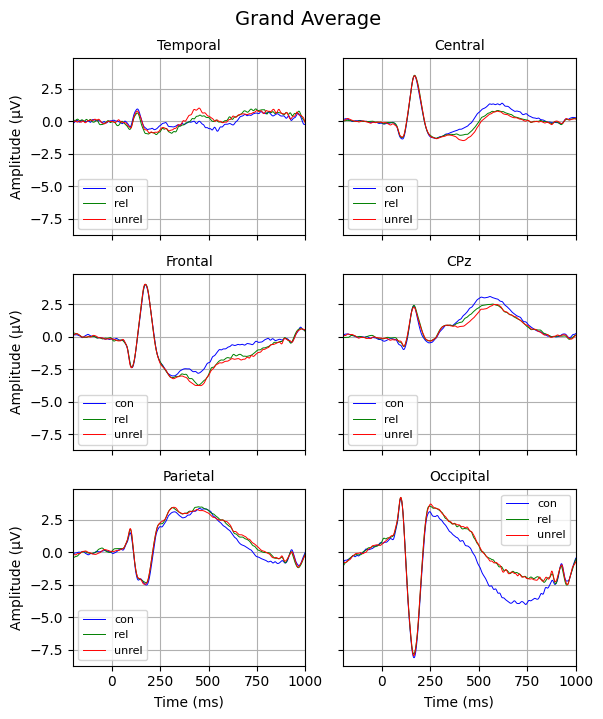

In [33]:
eeg_time_dict = {condition: np.linspace(0, len(data.times)-1, len(data.times)) for condition, data in grand_average.items()}

import numpy as np
import matplotlib.pyplot as plt

# Diccionario para abreviar nombres de condiciones
legend_labels = {
    'congruente': 'con',
    'incongruente_rel': 'rel',
    'incongruente_no_rel': 'unrel'
}

# Función para graficar los datos EEG en un diseño 3x2 con señales superpuestas
def plot_pools_superposed(time_dict, EEG_pool_data, condition_keys, pools, title, line_width=2):
    """
    Grafica las señales EEG en un diseño de 3x2, donde:
    - Cada gráfico corresponde a un pool.
    - Las tres condiciones actuales están superpuestas en cada gráfico.
    - Permite ajustar el grosor de las líneas con `line_width`.
    """
    n_pools = len(pools)

    # Crear figura con tamaño ajustado
    fig, axes = plt.subplots(3, 2, figsize=(6, 7), sharex=True, sharey=True)

    # Asegurar que axes sea un array 2D
    axes = np.atleast_2d(axes).flatten()

    # Definir colores específicos para cada condición
    colors = ['b', 'g', 'r']  

    # Iterar sobre cada pool y asignarlo a un subplot
    for i, (pool_name, electrodes) in enumerate(pools.items()):
        ax = axes[i]  # Seleccionar el subplot correspondiente

        # Graficar cada condición en el mismo subplot
        for j, condition in enumerate(condition_keys):
            time = np.array(time_dict[condition]) - 200  # Restar 200 ms al tiempo
            signal = EEG_pool_data[condition][pool_name]
            ax.plot(time, signal*1000000, label=legend_labels[condition], color=colors[j], linewidth=line_width)  # Usar etiquetas abreviadas

        # Configurar el rango del eje X para que vaya de -200 ms a 1000 ms
        ax.set_xlim([-200, 1000])

        # Configuración del subplot
        ax.set_title(f"{pool_name}", fontsize=10)
        ax.grid(True)
        ax.legend(fontsize=8)  # Reducir tamaño de la leyenda

        # Etiqueta del eje Y solo en la primera columna
        if i % 2 == 0:
            ax.set_ylabel("Amplitude (μV)", fontsize=10)

        # Etiqueta del eje X solo en la última fila
        if i >= n_pools - 2:
            ax.set_xlabel("Time (ms)", fontsize=10)

    # Eliminar ejes vacíos si hay menos de 6 pools
    for i in range(n_pools, 6):
        fig.delaxes(axes[i])

    # Ajustar diseño de la figura
    plt.tight_layout()
    plt.suptitle(title, fontsize=14, y=1.02)  # Título general
    plt.show()


# Llamar a la función con grosor de línea ajustado
plot_pools_superposed(
    eeg_time_dict, 
    EEG_pool_data, 
    ['congruente', 'incongruente_rel', 'incongruente_no_rel'],  # Condiciones actuales superpuestas
    pools,  # Pools (máximo 6)
    'Grand Average',  # Título general
    line_width=0.7  # Ajusta el grosor de las líneas aquí
)


In [35]:
def plot_pools_superposed_individual(time_dict, EEG_pool_data, condition_keys, pools,
                                     output_dir=None, line_width=2, colors=None,
                                     legend_labels_list=None,
                                     window_highlight=(400, 800)):
    import os
    import numpy as np
    import matplotlib.pyplot as plt

    if colors is None:
        import seaborn as sns
        colors = sns.color_palette("colorblind", len(condition_keys))

    if len(colors) != len(condition_keys):
        raise ValueError("La cantidad de colores debe coincidir con la cantidad de condiciones.")

    if legend_labels_list is None:
        legend_labels_list = [condition for condition in condition_keys]

    for i, (pool_name, electrodes) in enumerate(pools.items()):
        fig, ax = plt.subplots(figsize=(5, 3))

        for j, condition in enumerate(condition_keys):
            time = np.array(time_dict[condition]) - 200
            signal = EEG_pool_data[condition][pool_name]*1000000
            ax.plot(time, signal, label=legend_labels_list[j], color=colors[j], linewidth=line_width)

        # Marcar ventana de interés
        xmin, xmax = window_highlight
        ax.axvspan(xmin, xmax, facecolor='lightgray', edgecolor='black', alpha=0.2, linewidth=1)

        ax.axvline(0, color='k', linestyle='--', linewidth=0.5, alpha=0.7)

        ax.set_title(f"Pool: {pool_name}", fontsize=12)
        ax.set_xlim([-200, 1000])
        ax.set_xlabel("Time (ms)", fontsize=10)
        ax.set_ylabel("Amplitude (μV)", fontsize=10)
        ax.grid(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        # ❌ Sin leyenda aquí
        # ax.legend(fontsize=8)

        plt.tight_layout()

        
        os.makedirs(output_dir, exist_ok=True)
        fig_path = os.path.join(output_dir, f"{pool_name}_plot.svg")
        plt.savefig(fig_path, dpi=300)

        #plt.close()
    
        plt.show()


In [37]:
def plot_legend_only(condition_keys, colors, legend_labels_list=None, line_width=2, output_path=None):
    import matplotlib.pyplot as plt
    import matplotlib.lines as mlines

    if legend_labels_list is None:
        legend_labels_list = condition_keys

    handles = [
        mlines.Line2D([], [], color=colors[i], linewidth=line_width, label=legend_labels_list[i])
        for i in range(len(condition_keys))
    ]

    fig, ax = plt.subplots(figsize=(3, 1.5))
    ax.legend(handles=handles, loc='center', frameon=False, ncol=len(condition_keys), fontsize=10)
    ax.axis('off')  # Ocultar ejes

    plt.tight_layout()
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    #plt.close()
   
    plt.show()
        


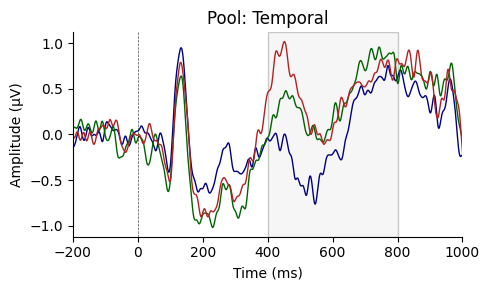

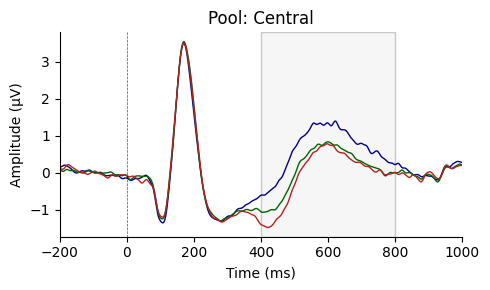

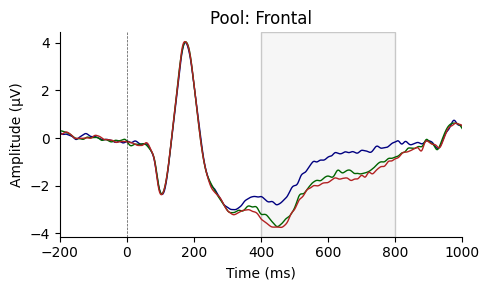

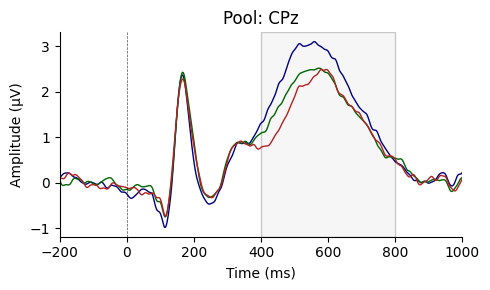

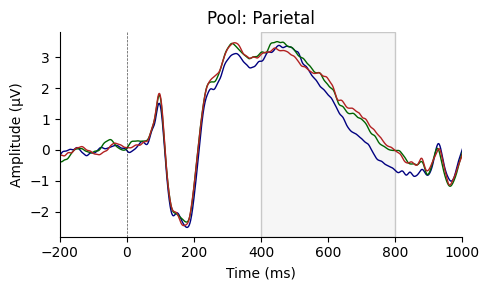

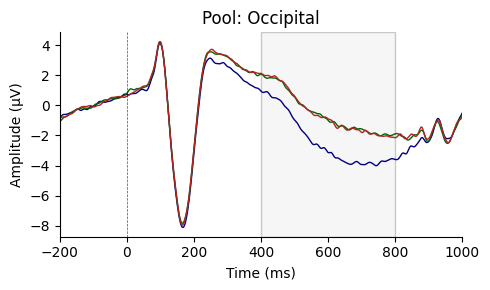

C:\Users\Usuario\AppData\Local\Temp\ipykernel_20292\1764989114.py:17: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


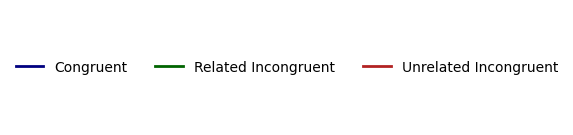

In [38]:
# Colores y etiquetas
my_colors = ['navy', 'darkgreen','firebrick']
my_labels = ['Congruente', 'Incongruente Rel.', 'Incongruente No Rel.']

# Graficar los pools sin leyenda
plot_pools_superposed_individual(
    eeg_time_dict,
    EEG_pool_data,
    ['congruente', 'incongruente_rel', 'incongruente_no_rel'],
    pools,
    colors=my_colors,
    legend_labels_list=my_labels,
    window_highlight=(400, 800),
    line_width=1,
    output_dir="figuras"
)

# Crear la leyenda por separado
plot_legend_only(
    ['Congruent', 'Related Incongruent', 'Unrelated Incongruent'],
    colors=my_colors,
    legend_labels_list= ['Congruent', 'Related Incongruent', 'Unrelated Incongruent'],
    output_path="figuras/legend.svg"
)


Topoplots con puntos filtrados generados exitosamente.


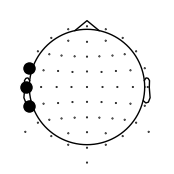

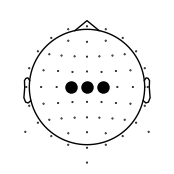

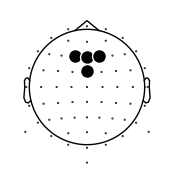

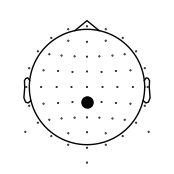

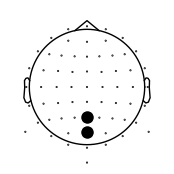

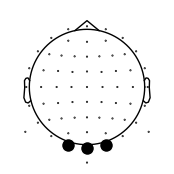

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import mne
import os

# Crear carpeta si no existe
os.makedirs("figuras", exist_ok=True)

# Lista base de canales (ordenada como en Biosemi64)
ch_ = ['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3',
       'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3',
       'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2',
       'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8',
       'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2']

# Diccionario de agrupaciones
pools = {
    "Temporal": ['FT7', 'T7','TP7'],
    "Central": ['C1', 'C2', 'Cz'],
    "Frontal": ['F1', 'F2', 'FCz', 'Fz'],
    "CPz": ['CPz'],
    "Parietal": ['POz', 'Pz'],
    "Occipital": [ 'O1', 'O2', 'Oz']
}

# Crear montaje e info
# montage = mne.channels.make_standard_montage("biosemi64")
# info = mne.create_info(ch_names=ch_, sfreq=1024, ch_types="eeg")
# info.set_montage(montage)

# Datos en cero
data_blanco = np.zeros((len(ch_), 1))
evoked = mne.EvokedArray(data_blanco, info)

# Iterar sobre los pools
for nombre_pool, electrodos_pool in pools.items():
    # Máscara de nombres
    ch_masked = [ch if ch in electrodos_pool else '' for ch in ch_]
    
    # Máscara de puntos visibles (solo True donde el canal está en el pool)
    mask = np.array([ch in electrodos_pool for ch in ch_])
    
    # Crear figura
    fig, ax = plt.subplots(figsize=(2, 2))
    mne.viz.plot_topomap(
        evoked.data[:, 0],
        evoked.info,
        cmap="gray_r",
        contours=0,
        show=False,
        axes=ax,
        vlim=(0, 1e-6),
        outlines="head",
        names=None,
        mask=mask,
        mask_params=dict(marker='o', markersize=10, markerfacecolor='black', markeredgecolor='white')
    )
    ax.set_title('', fontsize=14)
    
    # Guardar
    fig.savefig(f"figuras/topoplot_blanco_{nombre_pool}.pdf", format='pdf')
    fig.savefig(f"figuras/topoplot_blanco_{nombre_pool}.svg", format='svg')
    #plt.close(fig)
    plt.show
print("Topoplots con puntos filtrados generados exitosamente.")
